In [4]:
# Importing Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

In [2]:
file_path = '../data/laptops_data_exploring.csv'
df = pd.read_csv(file_path)
df.head()

,Unnamed: 0.1,Unnamed: 0,Manufacturer,Category,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_pounds,Price,Price-binned,Screen-Full_HD,Screen-IPS_panel
0,0,0,Acer,4,2,1,5,14.0,0.551724,8,256,3.52800,978,Low,0,1
1,1,1,Dell,3,1,1,3,15.6,0.689655,4,256,4.85100,634,Low,1,0
2,2,2,Dell,3,1,1,7,15.6,0.931034,8,256,4.85100,946,Low,1,0
3,3,3,Dell,4,2,1,5,13.3,0.551724,8,128,2.69010,1244,Low,0,1
4,4,4,HP,4,2,1,7,15.6,0.620690,8,256,4.21155,837,Low,1,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238 entries, 0 to 237
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0.1      238 non-null    int64  
 1   Unnamed: 0        238 non-null    int64  
 2   Manufacturer      238 non-null    object 
 3   Category          238 non-null    int64  
 4   GPU               238 non-null    int64  
 5   OS                238 non-null    int64  
 6   CPU_core          238 non-null    int64  
 7   Screen_Size_inch  238 non-null    float64
 8   CPU_frequency     238 non-null    float64
 9   RAM_GB            238 non-null    int64  
 10  Storage_GB_SSD    238 non-null    int64  
 11  Weight_pounds     238 non-null    float64
 12  Price             238 non-null    int64  
 13  Price-binned      238 non-null    object 
 14  Screen-Full_HD    238 non-null    int64  
 15  Screen-IPS_panel  238 non-null    int64  
dtypes: float64(3), int64(11), object(2)
memory u

### Task 1 - Single Linear Regression


"CPU_frequency" is the parameter with the lowest p-value among the different features of the dataset. Create a single feature Linear Regression model that fits the pair of "CPU_frequency" and "Price" to find he model for prediction

In [6]:
lm = LinearRegression()

X = df[['CPU_frequency']]
Y = df[['Price']]

lm.fit(X, Y)

Yhat=lm.predict(X)

Generate the Distribuition plot for the predicted values and that of the actual values. How well did the model perfom?


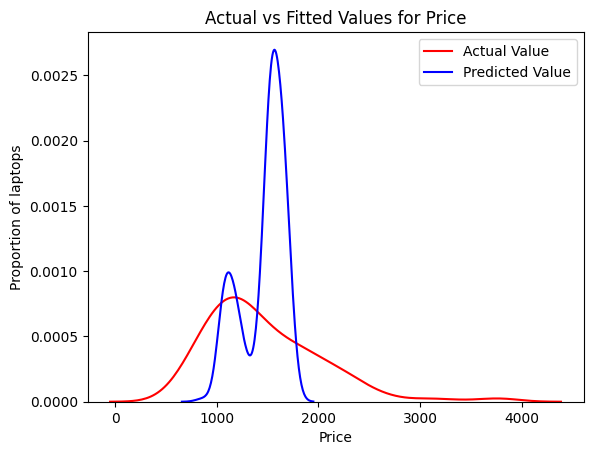

In [17]:
# Criando o gráfico de densidade para valores reais
#ax1 = sns.displot(['Price'], hist=False, color='r', label='Actual Value')
sns.kdeplot(data=df, x="Price", color='r', label='Actual Value')

# Criando o gráfico de densidade para valores previstos
#sns.displot(Yhat, hist=False, color='b', label='Fitted Values', ax=ax1)


#Como Yhat é gerado pelo método .predict(), ele normalmente retorna um array NumPy com duas dimensões. 
# Isso pode ser o motivo do erro que você encontrou ao tentar usá-lo no sns.kdeplot().


Yhat = np.ravel(Yhat)  # Converte para uma dimensão
sns.kdeplot(Yhat, color='b', label='Fitted Values')


plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price')
plt.ylabel('Proportion of laptops')
plt.legend(['Actual Value', 'Predicted Value'])
plt.show()

In [20]:
print(f"Min: {Yhat.min()}, Max: {Yhat.max()}")
print(f"Min: {df['Price'].min()}, Max: {df['Price'].max()}")

#parece que o intervalo de Price é bem maior do que o de Yhat. 
# O preço real varia de 527 a 3810, enquanto os valores previstos estão entre 868 e 1738. 
# Isso sugere que o modelo pode estar subestimando os valores mais altos e superestimando os mais baixos.


Min: 868.224050607718, Max: 1738.8547971637386
Min: 527, Max: 3810


Evaluate the Mean Squared Error and R^2 socre values for the model

In [21]:
mse_slr = mean_squared_error(df['Price'], Yhat)
r2_score_slr = lm.score(X, Y)

print('The R-square for Linear Regression is: ', r2_score_slr)
print('The mean square error of price and predicted value is: ', mse_slr)

The R-square for Linear Regression is:  0.1344436321024326
The mean square error of price and predicted value is:  284583.4405868629


### Task 2 - Multiple Linear Regression

Os parâmetros que possuem um p-valor baixo o suficiente para indicar uma forte relação com o valor de "Price" são: "CPU_frequency", "RAM_GB", "Storage_GB_SSD", "CPU_core", "OS", "GPU" e "Category". Utilize todas essas variáveis para criar um sistema de regressão linear múltipla.

In [25]:
lm1 = LinearRegression()
Z = df[['CPU_frequency', 'RAM_GB', 'Storage_GB_SSD', 'CPU_core', 'OS', 'GPU', 'Category']]
lm1.fit(Z, Y)
Y_hat = lm1.predict(Z)

Plot the Distribution graph of the predicted values as well as the Actual values

Text(0, 0.5, 'Proportion of laptops')

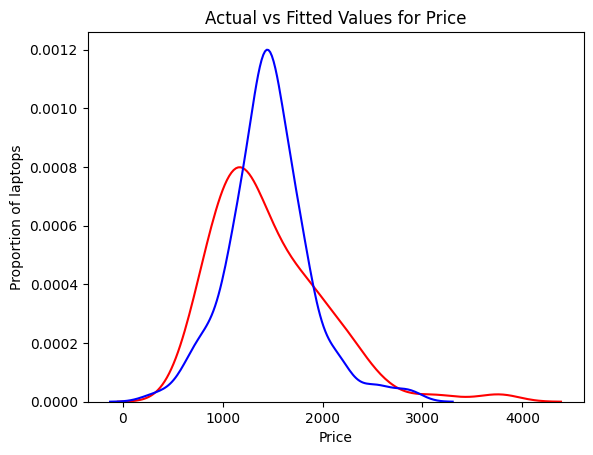

In [26]:
sns.kdeplot(data=df, x="Price", color='r', label='Actual Value')

Y_hat = np.ravel(Y_hat)  # Converte para uma dimensão
sns.kdeplot(Y_hat, color='b', label='Fitted Values')

plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price')
plt.ylabel('Proportion of laptops')


Finde the R^2 score and the MSE value for this fit. Is this better or worst than the performance of Single Linear Regression?

In [30]:
mse_smr = mean_squared_error(df['Price'], Y_hat)
r2_score_smr = lm1.score(Z, Y)

print('The R-square for Linear Regression is: ', r2_score_smr)
print('The mean square error of price and predicted value is: ', mse_smr)

The R-square for Linear Regression is:  0.5082509055187376
The mean square error of price and predicted value is:  161680.57263893104


### Task 3 - Polynomia Regression

Use the variable "CPU_frequency" to create Polynomial features. Try this for 3 different values of polynomial degrees. Remember that polynomial fits are done using numpy.polyfit

In [ ]:
#Esse erro ocorre porque np.polyfit() espera que os arrays de entrada (X e Y) sejam unidimensionais, 
# e parece que Y ainda está em formato de DataFrame, não de array NumPy.


#np.polyfit(X, Y, 1) ajusta uma regressão linear (grau 1) aos dados.
#np.poly1d(f1) cria um objeto polinomial, permitindo que você faça previsões e avalie a curva.



X = df[['CPU_frequency']].to_numpy().flatten()
Y = df[['Price']].to_numpy().flatten()  # Convertendo Y para 1D

f1 = np.polyfit(X, Y, 1)
p1 = np.poly1d(f1)

f3 = np.polyfit(X, Y, 3)
p3 = np.poly1d(f3)

f5 = np.polyfit(X, Y, 5)
p5 = np.poly1d(f5)

Plot the regression output against the actual data points to note how the data fits in each case. To plot the polybomial response over the actual data points, you have the function shown below

In [36]:
def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(independent_variable.min(), independent_variable.max(), 100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title(f'Polynomial Fit for Price ~ {Name}')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of Laptops')

    plt.show()
    plt.close()

Call this function for the 3 modes created and get the required graphs

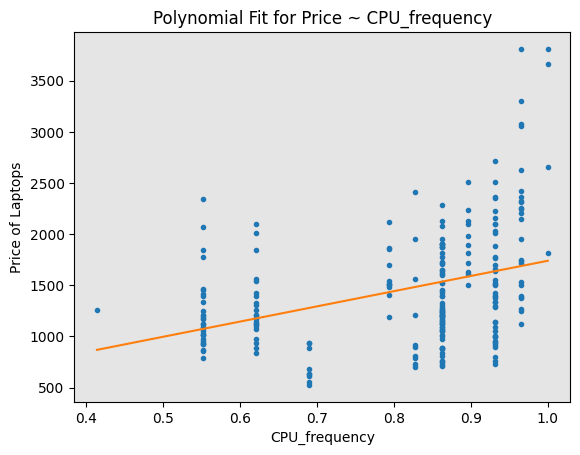

In [37]:
#Call for function of degree 1

PlotPolly(p1, X, Y, 'CPU_frequency')

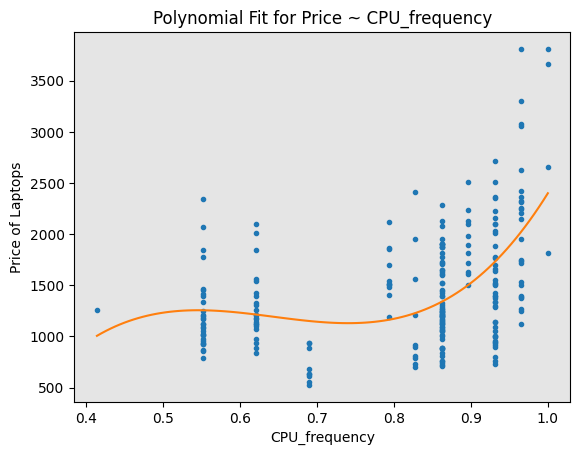

In [38]:
#Call for function of degree 3

PlotPolly(p3, X, Y, 'CPU_frequency')

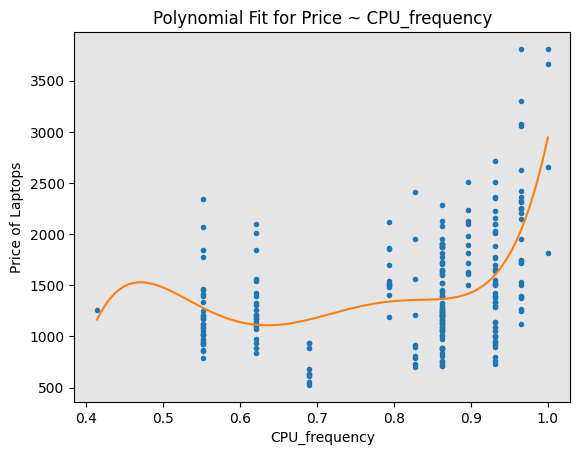

In [39]:
#Call for function of degree 5

PlotPolly(p5, X, Y, 'CPU_frequency')

Also, calculate the R^2 and MSE for these fits. For polynomial functions, the function sklearn.metrics.r2_socre will be used to calculate R^2 values

In [41]:
r_squared_1 = r2_score(Y, p1(X))
print('The R-square value for 1st degree polynomial is: ', r_squared_1)
print('The MSE value for 1st degree polynomial is: ', mean_squared_error(Y, p1(X)))
print('==============')

r_squared_3 = r2_score(Y, p3(X))
print('The R-square value for 3rd degree polynomial is: ', r_squared_3)
print('The MSE value for 3rd degree polynomial is: ', mean_squared_error(Y, p3(X)))
print('==============')

r_squared_5 = r2_score(Y, p5(X))
print('The R-square value for 5th degree polynomial is: ', r_squared_5)
print('The MSE value for 5th degree polynomial is: ', mean_squared_error(Y, p5(X)))

The R-square value for 1st degree polynomial is:  0.1344436321024326
The MSE value for 1st degree polynomial is:  284583.4405868629
The R-square value for 3rd degree polynomial is:  0.2669264079653113
The MSE value for 3rd degree polynomial is:  241024.86303848765
The R-square value for 5th degree polynomial is:  0.3030822706443915
The MSE value for 5th degree polynomial is:  229137.29548053455


### Task 4 - Pipeline

Create a pipeline that performs parameter scaling, Polynomial Feature generation and Linear regression. Use the set of multiple features as before to create this pipeline

In [42]:
Input=[('scale', StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model', LinearRegression())]
pipe=Pipeline(Input)
Z = Z.astype(float)
pipe.fit(Z, Y)
ypipe=pipe.predict(Z)

Evaluate the MSE and R^2 for the predicted output

In [43]:
print('MSE for multi-variable polynomial pipeline is: ', mean_squared_error(Y, ypipe))
print('R^2 for multi-variable polynomial pipeline is: ', r2_score(Y, ypipe))

MSE for multi-variable polynomial pipeline is:  120595.86128028373
R^2 for multi-variable polynomial pipeline is:  0.6332094535859658


Yow should now have seem that the values of R^2 increase as we fo from Single Linear Regression to Multiple Linear Regression. Further, if we go for multiple linear regression extended with polynomial features, we get an even better R^2 value.